1-Data Preprocessing
by transactions 

In [2]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
open_the_server_in_mongo = MongoClient("mongodb://localhost:27017/")
db = open_the_server_in_mongo["RetailCustomerDB"]

In [4]:
Transactions_Collection= pd.DataFrame(list(db["Transactions Collection"].find()))

In [5]:
print(Transactions_Collection)

                            _id     SaleID   SaleDate  TotalAmount CustomerID  \
0      68eb09c852b244f0610c6018  SAL015796 2024-03-10      2627.89  CUST01851   
1      68eb09c852b244f0610c6019  SAL000861 2024-05-25      3532.10  CUST00571   
2      68eb09c852b244f0610c601a  SAL038159 2024-05-10      1809.06  CUST01775   
3      68eb09c852b244f0610c601b  SAL044733 2024-03-23      3842.61  CUST01504   
4      68eb09c852b244f0610c601c  SAL011285 2025-03-25       351.96  CUST03556   
...                         ...        ...        ...          ...        ...   
99995  68eb09c952b244f0610de6b3  SAL040655 2024-04-22      2611.44  CUST02978   
99996  68eb09c952b244f0610de6b4  SAL027580 2024-12-31      1461.08  CUST04101   
99997  68eb09c952b244f0610de6b5  SAL007724 2025-08-08      4792.22  CUST01479   
99998  68eb09c952b244f0610de6b6  SAL010647 2024-12-20       517.73  CUST03647   
99999  68eb09c952b244f0610de6b7  SAL013800 2025-04-03      2726.73  CUST01518   

               CustomerName

In [6]:
Transactions_Collection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   _id               100000 non-null  object        
 1   SaleID            100000 non-null  object        
 2   SaleDate          100000 non-null  datetime64[ns]
 3   TotalAmount       100000 non-null  float64       
 4   CustomerID        100000 non-null  object        
 5   CustomerName      100000 non-null  object        
 6   Gender            100000 non-null  object        
 7   Age               100000 non-null  int64         
 8   CustomerCity      100000 non-null  object        
 9   JoinDate          100000 non-null  datetime64[ns]
 10  BranchID          100000 non-null  object        
 11  BranchName        100000 non-null  object        
 12  BranchCity        100000 non-null  object        
 13  Manager           100000 non-null  object        
 14  Produ

In [7]:
df=pd.get_dummies(Transactions_Collection,columns=['Gender'],drop_first=True)

In [8]:
df

_id     SaleID   SaleDate  TotalAmount CustomerID  \
0      68eb09c852b244f0610c6018  SAL015796 2024-03-10      2627.89  CUST01851   
1      68eb09c852b244f0610c6019  SAL000861 2024-05-25      3532.10  CUST00571   
2      68eb09c852b244f0610c601a  SAL038159 2024-05-10      1809.06  CUST01775   
3      68eb09c852b244f0610c601b  SAL044733 2024-03-23      3842.61  CUST01504   
4      68eb09c852b244f0610c601c  SAL011285 2025-03-25       351.96  CUST03556   
...                         ...        ...        ...          ...        ...   
99995  68eb09c952b244f0610de6b3  SAL040655 2024-04-22      2611.44  CUST02978   
99996  68eb09c952b244f0610de6b4  SAL027580 2024-12-31      1461.08  CUST04101   
99997  68eb09c952b244f0610de6b5  SAL007724 2025-08-08      4792.22  CUST01479   
99998  68eb09c952b244f0610de6b6  SAL010647 2024-12-20       517.73  CUST03647   
99999  68eb09c952b244f0610de6b7  SAL013800 2025-04-03      2726.73  CUST01518   

               CustomerName  Age      CustomerCity   JoinDate BranchID  ...  \
0          Ashley Rodriguez   18  South Henryshire 2023-02-21    BR029  ...   
1            Christina Diaz   54       Millermouth 2021-12-16    BR042  ...   
2              Leslie Davis   20  Port Kennethview 2023-05-20    BR043  ...   
3             Felicia Bauer   64       Lake Sandra 2022-02-14    BR002  ...   
4            Matthew Taylor   56     Franciscoview 2020-11-17    BR027  ...   
...                     ...  ...               ...        ...      ...  ...   
99995         Timothy Floyd   67       Kennethbury 2022-04-23    BR008  ...   
99996           Dana Morton   45        West David 2025-09-27    BR049  ...   
99997         Alicia Wright   64        Millerstad 2025-04-04    BR017  ...   
99998  Mrs. Alexandra Sharp   65       New Kathryn 2021-02-25    BR043  ...   
99999            Lucas Hall   48         Tranville 2021-10-13    BR011  ...   

      ProductID          ProductName         Category    Brand  \
0       PRD0027   Lenovo Picture 554           Beauty   Lenovo   
1       PRD0129       LG Capital 115            Books       LG   
2       PRD0150     Canon Anyone 864             Toys    Canon   
3       PRD0392  Philips Meeting 273        Groceries  Philips   
4       PRD0325    Philips World 419           Sports  Philips   
...         ...                  ...              ...      ...   
99995   PRD0121      HP Campaign 862        Groceries       HP   
99996   PRD0100    Apple Outside 254       Automotive    Apple   
99997   PRD0492  Samsung Nothing 227            Books  Samsung   
99998   PRD0399       LG Compare 248  Home Appliances       LG   
99999   PRD0396   Canon Somebody 338             Toys    Canon   

      ProductUnitPrice SaleDetailID Quantity  SaleUnitPrice SaleTotalPrice  \
0              2468.10    SD0000001        3         265.30         795.90   
1              1360.20    SD0000002        7         763.94        5347.58   
2              3467.50    SD0000003        8          84.77         678.16   
3              1497.97    SD0000004        5         476.15        2380.75   
4              4946.49    SD0000005        5         991.49        4957.45   
...                ...          ...      ...            ...            ...   
99995          3359.62    SD0099996        9         791.74        7125.66   
99996          3112.43    SD0099997        8         884.43        7075.44   
99997          1125.59    SD0099998        8         220.15        1761.20   
99998          1235.32    SD0099999        7         493.37        3453.59   
99999          2439.10    SD0100000        6         584.31        3505.86   

       Gender_Male  
0             True  
1            False  
2            False  
3            False  
4            False  
...            ...  
99995        False  
99996         True  
99997         True  
99998         True  
99999        False  

[100000 rows x 23 columns]

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['CityCode'] = encoder.fit_transform(df['CustomerCity'])

import pandas as pd
pd.set_option('display.max_rows', None)  
print(df[['CustomerCity', 'CityCode']])



                 CustomerCity  CityCode
0            South Henryshire      3529
1                 Millermouth      2033
2            Port Kennethview      2989
3                 Lake Sandra      1744
4               Franciscoview      1038
5                 South Grant      3521
6                   Davidtown       551
7                Fuentesshire      1054
8                    East Kim       823
9                   Bellville       195
10                 West Shawn      4198
11               New Brianton      2124
12               Buchananbury       302
13              South Anthony      3425
14             Port Brendaton      2861
15             South Codytown      3466
16                Pittmantown      2820
17                 Debraville       571
18                 Arnoldfort       132
19                 Cindymouth       433
20                 Smithville      3395
21              Angelicamouth       104
22               Saundersberg      3318
23               Port Matthew      3023


In [10]:
df['CustomerCity'].value_counts()

CustomerCity
West Thomas               163
New John                  154
New Michael               138
Danielmouth               132
Michaelport               121
North Christopher         116
Port David                110
Lake James                108
North William             102
Port Michael              102
South Jason               101
West James                101
North David               100
West Rebecca               99
New Richard                99
New William                98
West David                 97
South Michael              94
North Jessica              91
Lake Michael               91
Johnsonview                90
West Michael               89
Davidmouth                 89
Davidside                  86
Michaelstad                86
Davidfort                  85
Lake Matthew               85
Johnsonmouth               84
Lake Jessica               84
Jenniferbury               83
Joshuaside                 83
Lake John                  83
Lake Sandra                

In [11]:
pd.set_option('display.max_columns', None)
display(df.head())  


_id     SaleID   SaleDate  TotalAmount CustomerID  \
0  68eb09c852b244f0610c6018  SAL015796 2024-03-10      2627.89  CUST01851   
1  68eb09c852b244f0610c6019  SAL000861 2024-05-25      3532.10  CUST00571   
2  68eb09c852b244f0610c601a  SAL038159 2024-05-10      1809.06  CUST01775   
3  68eb09c852b244f0610c601b  SAL044733 2024-03-23      3842.61  CUST01504   
4  68eb09c852b244f0610c601c  SAL011285 2025-03-25       351.96  CUST03556   

       CustomerName  Age      CustomerCity   JoinDate BranchID BranchName  \
0  Ashley Rodriguez   18  South Henryshire 2023-02-21    BR029  Branch 29   
1    Christina Diaz   54       Millermouth 2021-12-16    BR042  Branch 42   
2      Leslie Davis   20  Port Kennethview 2023-05-20    BR043  Branch 43   
3     Felicia Bauer   64       Lake Sandra 2022-02-14    BR002   Branch 2   
4    Matthew Taylor   56     Franciscoview 2020-11-17    BR027  Branch 27   

      BranchCity             Manager ProductID          ProductName  \
0   Timothyburgh      Michael Foster   PRD0027   Lenovo Picture 554   
1  Macdonaldberg     Taylor Anderson   PRD0129       LG Capital 115   
2  Rogersborough   Christine Barrett   PRD0150     Canon Anyone 864   
3      Ellisside  Frederick Mitchell   PRD0392  Philips Meeting 273   
4      Sarahtown         Kevin Jones   PRD0325    Philips World 419   

    Category    Brand  ProductUnitPrice SaleDetailID  Quantity  SaleUnitPrice  \
0     Beauty   Lenovo           2468.10    SD0000001         3         265.30   
1      Books       LG           1360.20    SD0000002         7         763.94   
2       Toys    Canon           3467.50    SD0000003         8          84.77   
3  Groceries  Philips           1497.97    SD0000004         5         476.15   
4     Sports  Philips           4946.49    SD0000005         5         991.49   

   SaleTotalPrice  Gender_Male  CityCode  
0          795.90         True      3529  
1         5347.58        False      2033  
2          678.16        False      2989  
3         2380.75        False      1744  
4         4957.45        False      1038

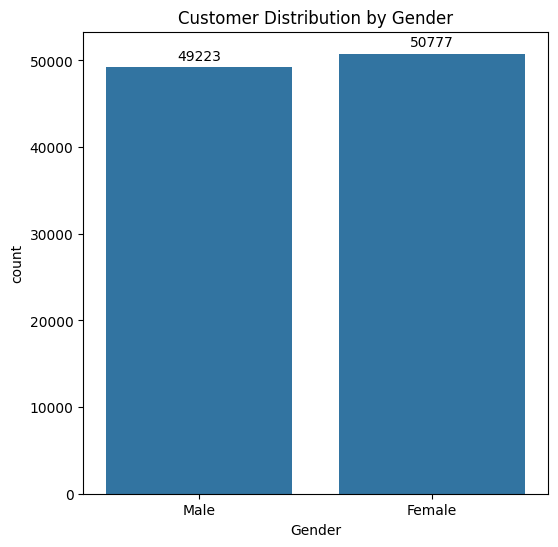

In [12]:
plt.figure(figsize=(6,6))
x=sns.countplot(x='Gender', data=Transactions_Collection)
plt.title("Customer Distribution by Gender")

for container in x.containers:
    x.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)


🏬 Total Sales by Branch (Heatmap)


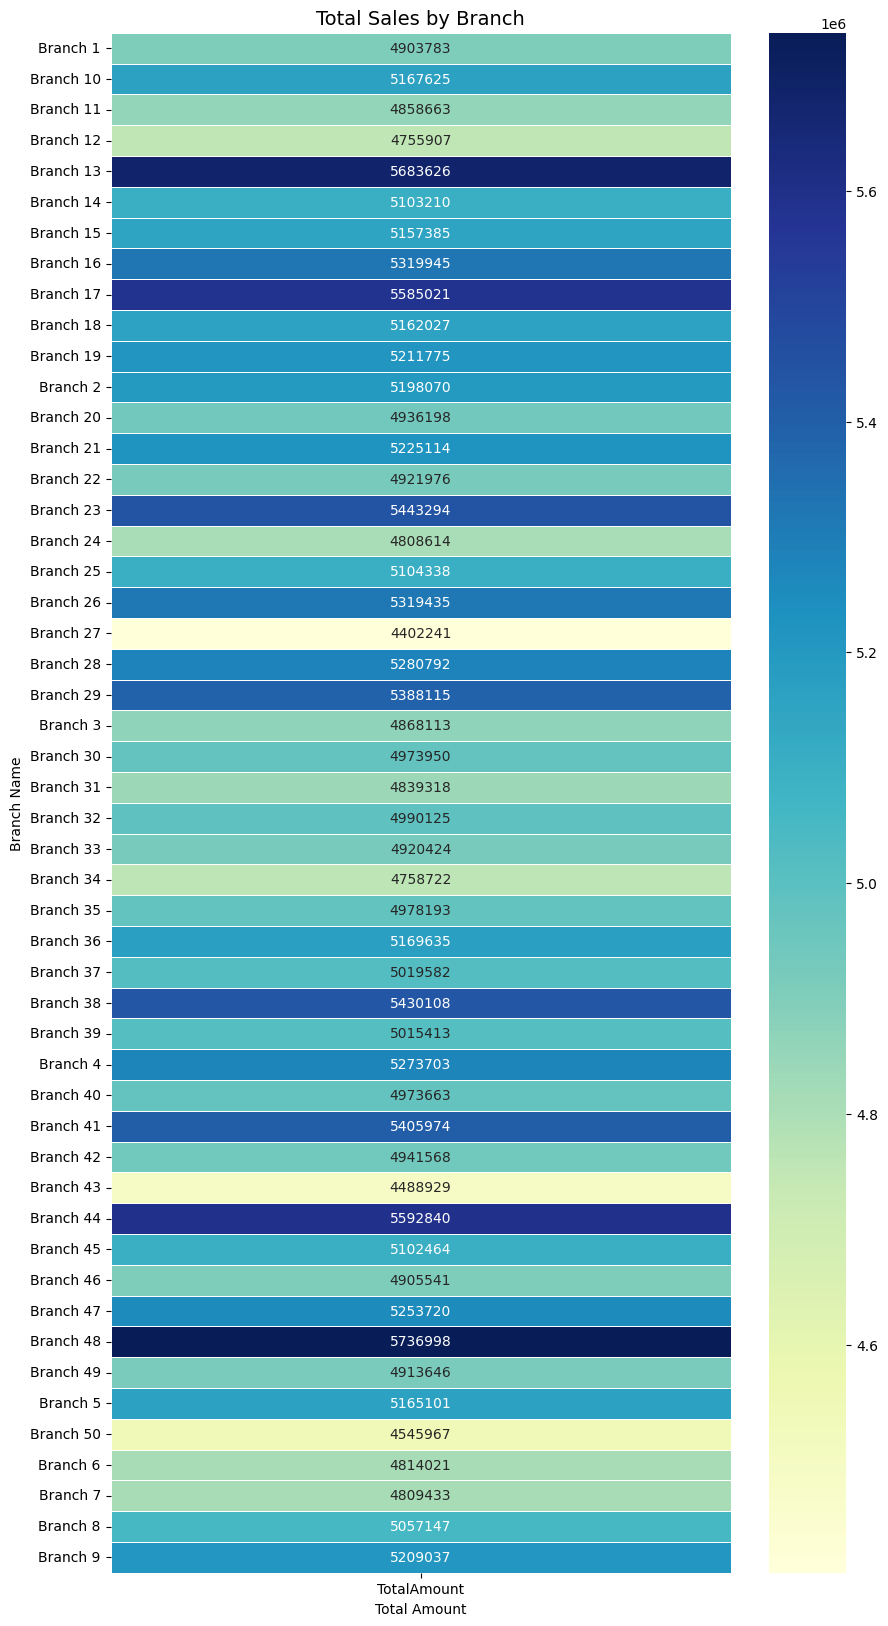

In [13]:
print("🏬 Total Sales by Branch (Heatmap)")

    # نحسب إجمالي المبيعات لكل فرع
branch_sales = Transactions_Collection.groupby('BranchName')['TotalAmount'].sum().reset_index()

    # نرتبهم تنازلياً حسب المبيعات
branch_sales = branch_sales.sort_values(by='TotalAmount', ascending=False)

    # نعيد تشكيل البيانات لتناسب heatmap
heat_data = branch_sales.pivot_table(index='BranchName', values='TotalAmount')

    # نرسم الخريطة الحرارية
plt.figure(figsize=(10, len(branch_sales) * 0.4))
sns.heatmap(heat_data,annot=True,fmt=".0f",cmap="YlGnBu",linewidths=0.5)
plt.title("Total Sales by Branch", fontsize=14)
plt.xlabel("Total Amount")
plt.ylabel("Branch Name")
plt.show()

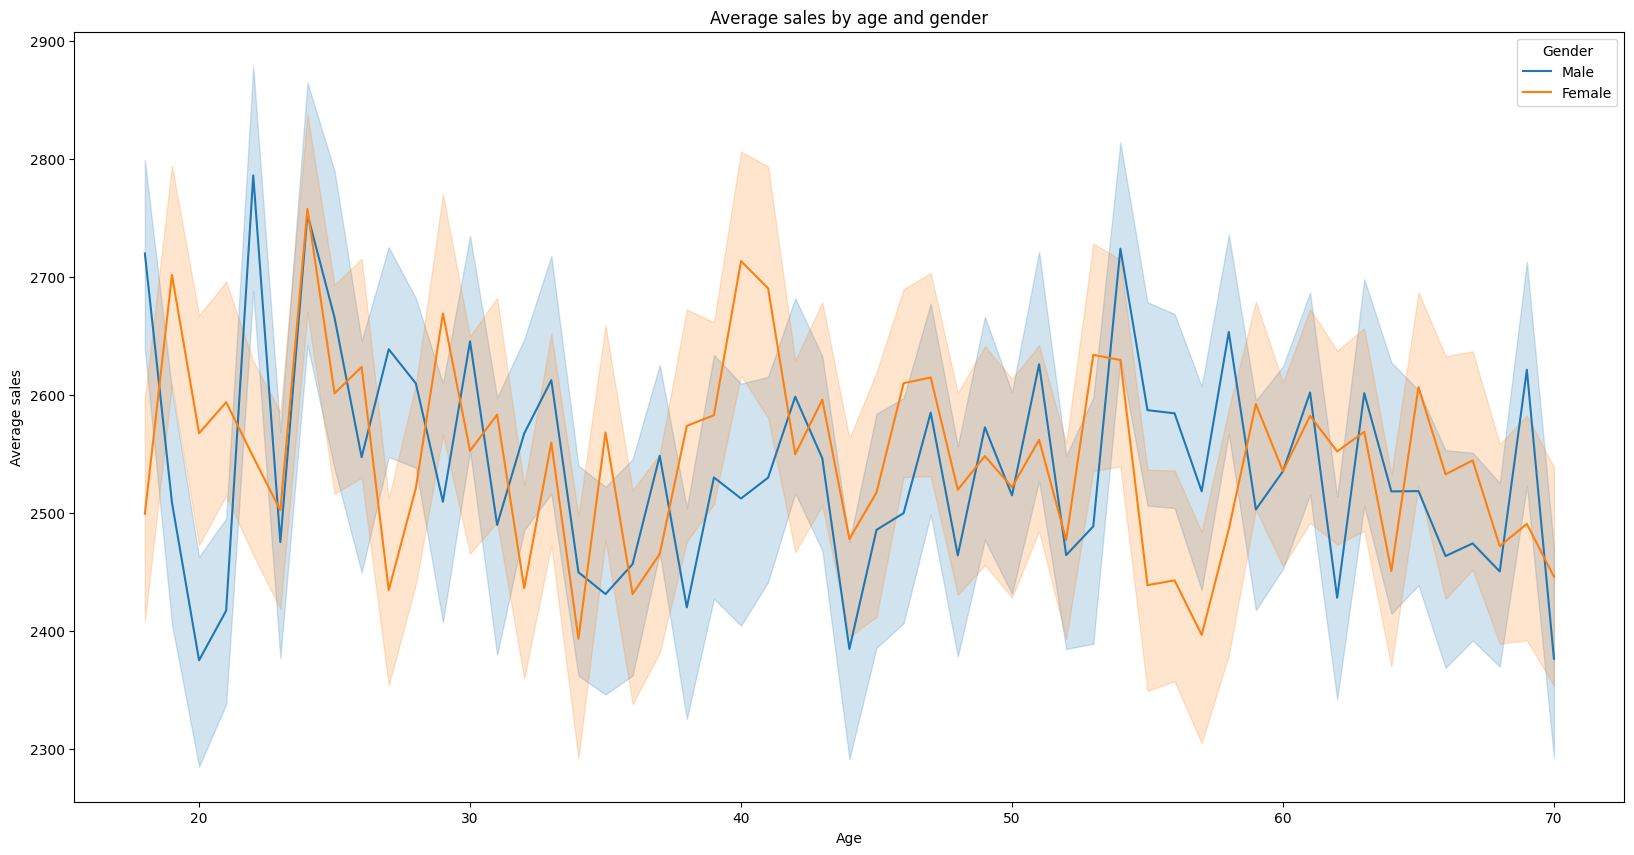

In [14]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age', y='TotalAmount', data=Transactions_Collection, hue='Gender', estimator='mean')
plt.title('Average sales by age and gender')
plt.xlabel("Age")
plt.ylabel('Average sales')
plt.show()

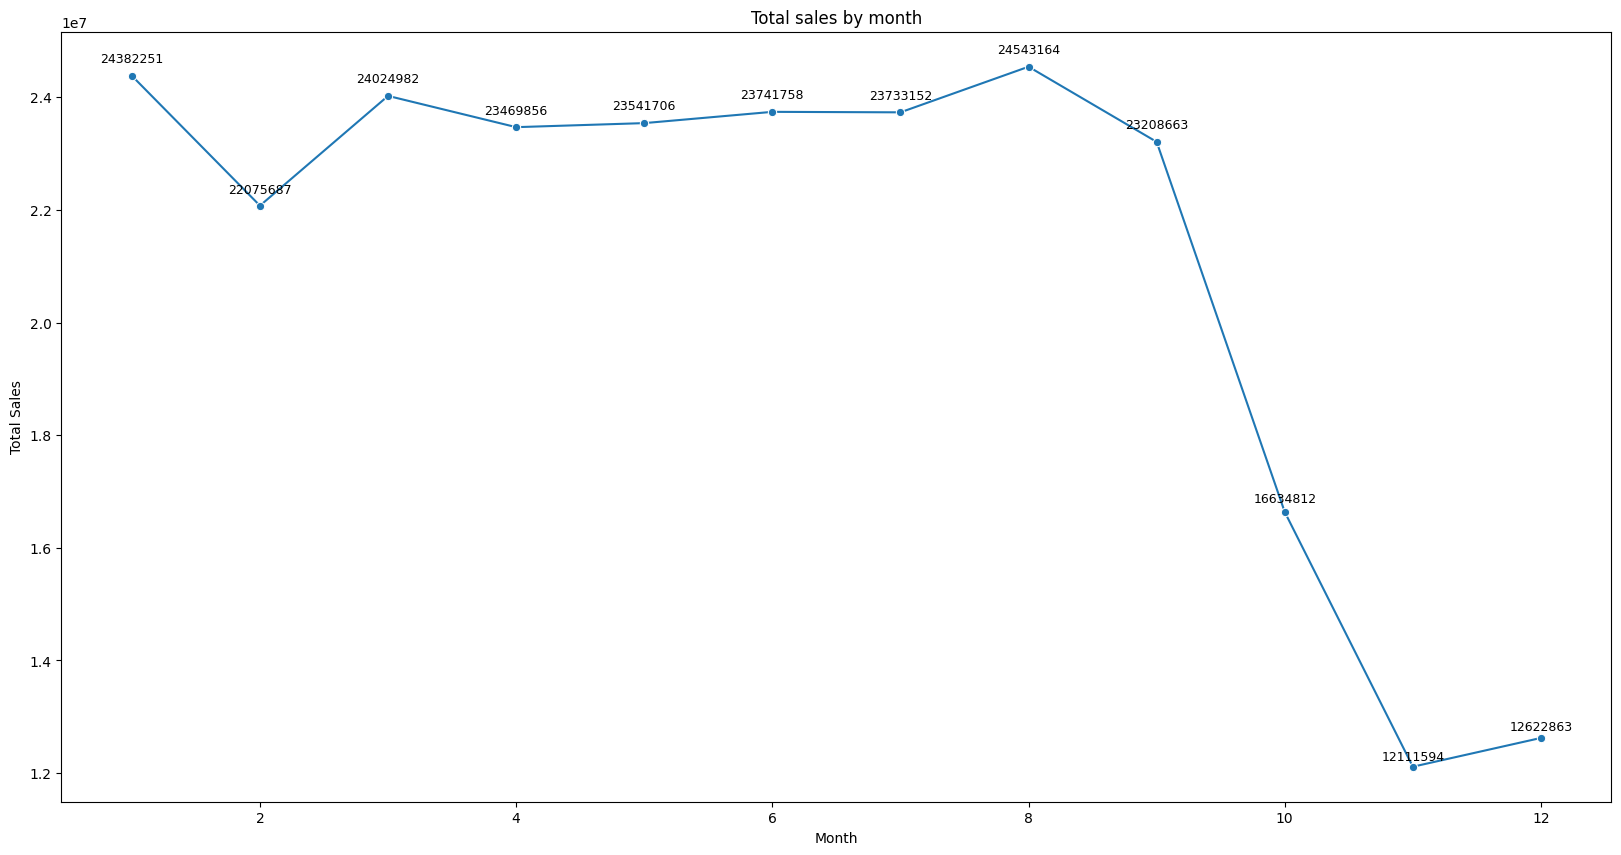

In [15]:

Transactions_Collection['Month'] = pd.to_datetime(Transactions_Collection['SaleDate']).dt.month
monthly_sales = Transactions_Collection.groupby('Month')['TotalAmount'].sum()

plt.figure(figsize=(20,10))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Total sales by month')
plt.xlabel('Month')
plt.ylabel('Total Sales')


for i, value in enumerate(monthly_sales.values):
    plt.text(monthly_sales.index[i], value + (value * 0.01), f"{value:.0f}", ha='center', fontsize=9)

C:\Users\C.M™\AppData\Local\Temp\ipykernel_13440\4191266208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='TotalAmount',y='CustomerCity',data=city_sales,palette='Blues_r')


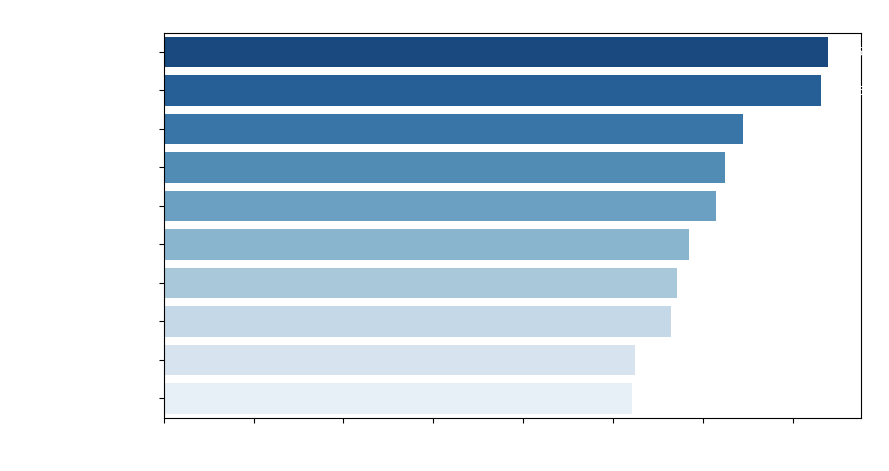

In [16]:
city_sales = Transactions_Collection.groupby('CustomerCity')['TotalAmount'].sum().reset_index()
city_sales = city_sales.sort_values(by='TotalAmount', ascending=False).head(10)

plt.figure(figsize=(9, 5))
bars = sns.barplot(x='TotalAmount',y='CustomerCity',data=city_sales,palette='Blues_r')

plt.title("Top 10 Cities by Total Sales", fontsize=14, color='white')
plt.xlabel("Total Sales", color='white')
plt.ylabel("City", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('none')
plt.gcf().patch.set_alpha(0.0)

for container in bars.containers:
    bars.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=3, color='white')

plt.show()

C:\Users\C.M™\AppData\Local\Temp\ipykernel_13440\2656159364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='TotalAmount',y='CustomerName',data=top_customers,palette='Greens_r')


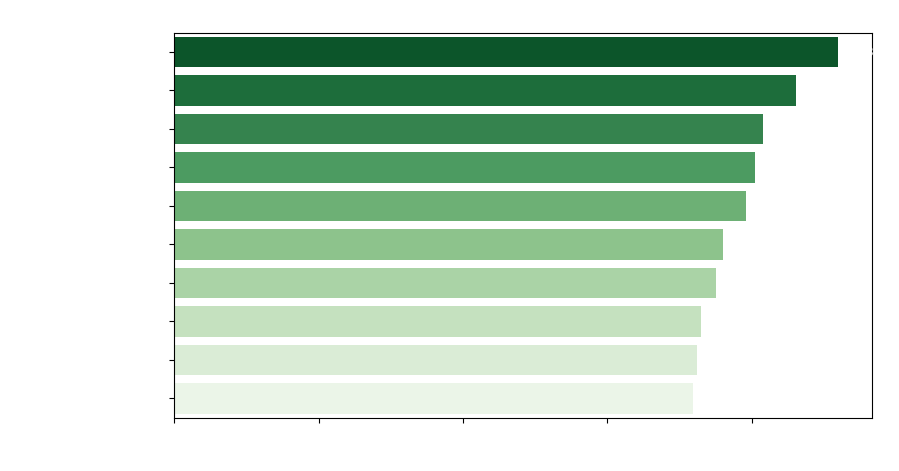

In [17]:
top_customers = Transactions_Collection.groupby('CustomerName')['TotalAmount'].sum().reset_index()
top_customers = top_customers.sort_values(by='TotalAmount', ascending=False).head(10)


plt.figure(figsize=(9, 5))
bars = sns.barplot(x='TotalAmount',y='CustomerName',data=top_customers,palette='Greens_r')

plt.title("Top 10 Customers by Total Sales", fontsize=14, color='white')
plt.xlabel("Total Sales", color='white')
plt.ylabel("Customer", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('none')
plt.gcf().patch.set_alpha(0.0)


for container in bars.containers:
    bars.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=3, color='white')

plt.show()


C:\Users\C.M™\AppData\Local\Temp\ipykernel_13440\1150773939.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='ProductName',x='Quantity',data=top_products,palette='Blues_d')


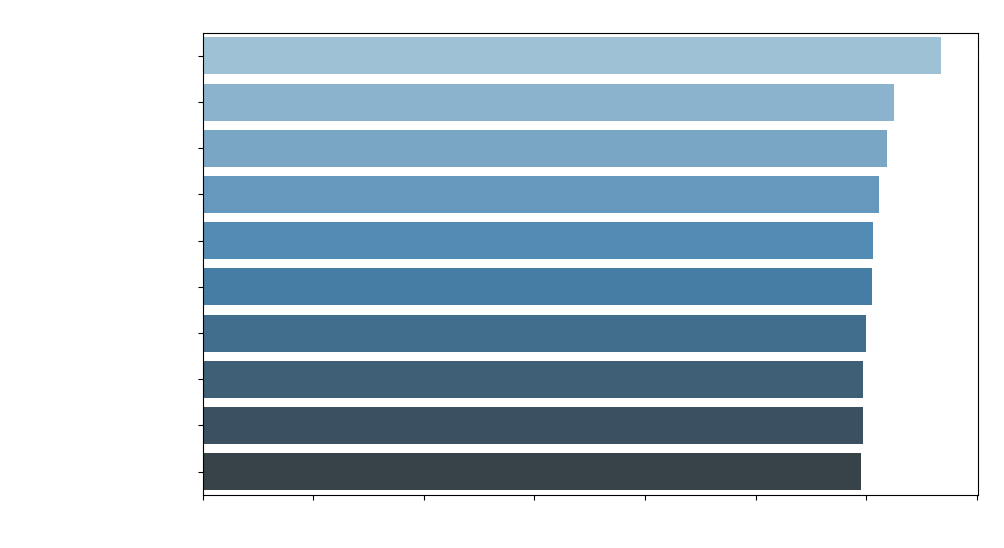

In [18]:

top_products = Transactions_Collection.groupby('ProductName')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = sns.barplot(y='ProductName',x='Quantity',data=top_products,palette='Blues_d')

plt.title('Top 10 Selling Products', fontsize=14, color='white')
plt.xlabel('Total Quantity Sold', color='white')
plt.ylabel('Product Name', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('none')
plt.gcf().patch.set_alpha(0.0)


for container in bars.containers:
    bars.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3, color='white')

plt.show()

C:\Users\C.M™\AppData\Local\Temp\ipykernel_13440\3587776552.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Brand',x='TotalAmount',data=avg_brand,palette='Purples_d')


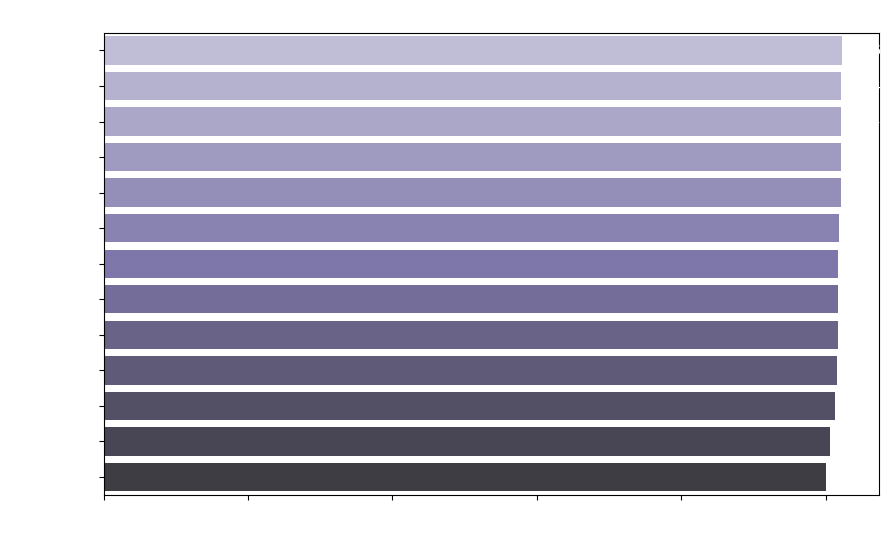

In [19]:
avg_brand = Transactions_Collection.groupby('Brand')['TotalAmount'].mean().reset_index()
avg_brand = avg_brand.sort_values(by='TotalAmount', ascending=False)


plt.figure(figsize=(10, 6))
bars = sns.barplot(y='Brand',x='TotalAmount',data=avg_brand,palette='Purples_d')

plt.title('Average Sales per Brand', fontsize=14, color='white')
plt.xlabel('Average Total Amount', color='white')
plt.ylabel('Brand', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('none')
plt.gcf().patch.set_alpha(0.0)


for container in bars.containers:
    bars.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3, color='white')

plt.show()
